In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%load_ext google.colab.data_table



1.   What is the biggest predictor of a large CO2 output per capita of a country?
2.   which countries are making the biggest strides in decreasing CO2 output?
3.   which non-fossil fuel energy technology will have the best price in the future?








In [3]:
#https://github.com/owid/co2-data
df_owid_c02 = pd.read_csv("https://raw.githubusercontent.com/ngarderen/Final-assignment---CO2-emissions/main/owid-co2-data.csv", encoding="latin1")

#https://ourworldindata.org/emissions-by-sector
HEBS = pd.read_csv("https://raw.githubusercontent.com/ngarderen/Final-assignment---CO2-emissions/main/ghg-emissions-by-sector.csv", encoding="latin1")
HEBS.rename(columns={'Entity': 'Country'}, inplace=True)

#https://github.com/owid/energy-data
energy_data = pd.read_csv("https://raw.githubusercontent.com/ngarderen/Final-assignment---CO2-emissions/main/owid-energy-data.csv", encoding="latin1")

#https://ourworldindata.org/grapher/levelized-cost-of-energy?time=1983..latest
energy_price = pd.read_csv("https://raw.githubusercontent.com/ngarderen/Final-assignment---CO2-emissions/main/levelized-cost-of-energy.csv", encoding="latin1")


Text(0.5, 1.0, 'Percentage co2 uitstoot in 2018 per categorie')

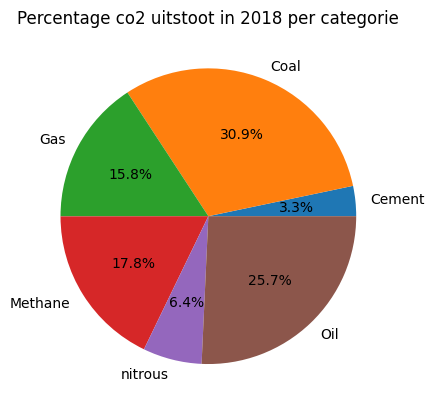

In [4]:
# global waardes in het jaar 2018
df_2018 = df_owid_c02.loc[(df_owid_c02['country'] == 'World') & (df_owid_c02['year'] == 2018), :]

# Annual total production-based emissions measured in millions of tonnes, 36826.508
total_co2 = df_2018.loc[:, "co2"]
categories = ["Cement", "Coal", "Gas", "Methane", "nitrous", "Oil"]
df3 = df_2018.loc[:, ["cement_co2", "coal_co2", "gas_co2", "methane", "nitrous_oxide", "oil_co2"]]

values = df3.values.flatten().tolist()
plt.pie(values, labels=categories, autopct='%1.1f%%')
plt.title("Percentage co2 uitstoot in 2018 per categorie")


Text(0.5, 1.0, 'Co2 uitstoot van 1990 tot 2018')

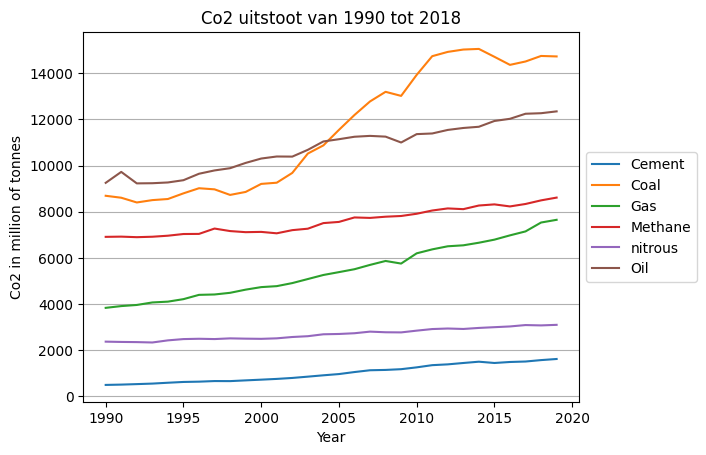

In [5]:
# het zelfde als hierboven maar dan over alle data
world_data = df_owid_c02[df_owid_c02['country'] == 'World']
categories = ["Cement", "Coal", "Gas", "Methane", "nitrous", "Oil"]

world_data2 = world_data.loc[:, ["year", "cement_co2", "coal_co2", "gas_co2", "methane", "nitrous_oxide", "oil_co2"]]
world_data2.dropna(axis=0, inplace=True)
world_data2.set_index("year", inplace=True)

values = world_data2.loc[:, ["cement_co2", "coal_co2", "gas_co2", "methane", "nitrous_oxide", "oil_co2"]]

# Plotting the line chart
plt.plot(values.index, values, label = categories)
plt.xlabel('Year')
plt.ylabel('Co2 in million of tonnes')
plt.grid(axis='y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Co2 uitstoot van 1990 tot 2018")


<ipython-input-6-78e66d1ff76a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HEBS3.drop(["Land-use change and forestry", "Other fuel combustion", "Aviation and shipping", "Waste"], axis=1, inplace=True)


Text(0.5, 1.0, 'Co2 uitstoot per sector')

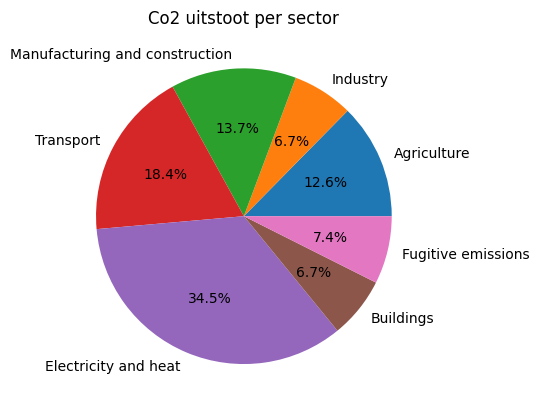

In [6]:

#global pie chart en eventueel lijn grafiek per continent

HEBS2 = HEBS[(HEBS['Year'] == 2019) & (HEBS['Country'] == "World")]
HEBS3 = HEBS2.iloc[:, 3:]
HEBS3.drop(["Land-use change and forestry", "Other fuel combustion", "Aviation and shipping", "Waste"], axis=1, inplace=True)

values = HEBS3.values.flatten().tolist()
Sectors = HEBS3.columns

plt.pie(values, labels=Sectors, autopct='%1.1f%%')
plt.title("Co2 uitstoot per sector")


<ipython-input-7-da7b14c9c624>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HEBS4.drop(["Land-use change and forestry", "Other fuel combustion", "Aviation and shipping", "Waste"], axis=1, inplace=True)


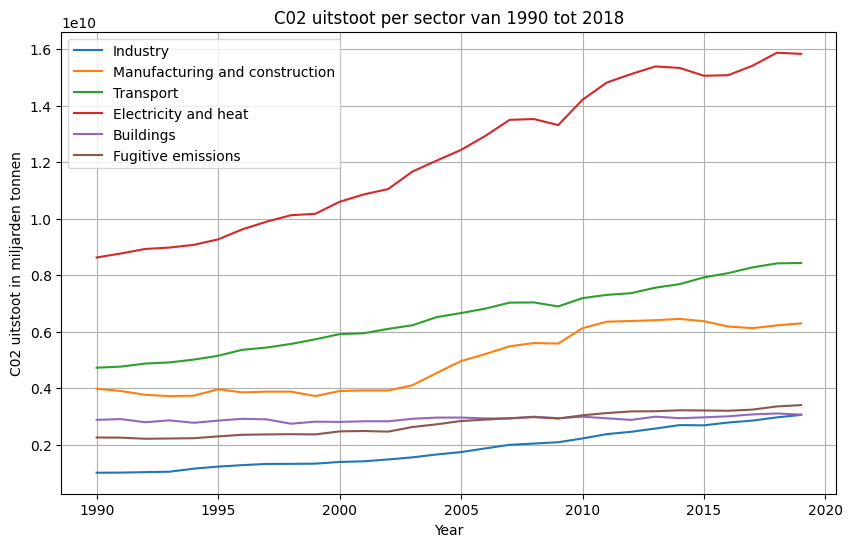

In [7]:
# Line chart met alle sector data vanaf 1990 tot 2018

HEBS4 = HEBS[HEBS["Country"] == "World"]
HEBS4.drop(["Land-use change and forestry", "Other fuel combustion", "Aviation and shipping", "Waste"], axis=1, inplace=True)
HEBS4.set_index("Year", inplace=True)


HEBS4 = HEBS4.iloc[:, 3:]
ax = HEBS4.plot(kind='line', figsize=(10, 6), legend=True, grid=True)
ax.set_title("C02 uitstoot per sector van 1990 tot 2018")
ax.set_ylabel("C02 uitstoot in miljarden tonnen")
plt.show()


<ipython-input-8-c4138e3a81ea>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tpc2["co2_per_capita"] = list_co2_per_capita


country
North America    11.290268
Europe            7.506034
South America     2.506489
Africa            1.054928
Asia              4.453685
Australia        16.665207
Name: co2_per_capita, dtype: float64

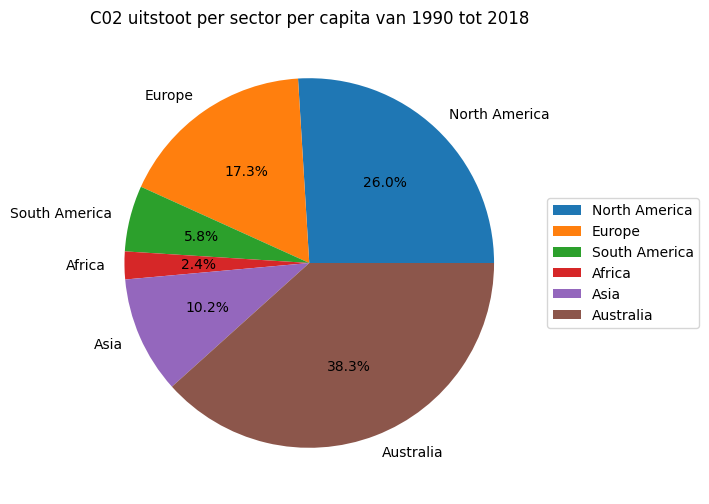

In [8]:
#tpc  = Total_per_Capita
# 4.792753 gemiddelde uitstoot per persoon per tonnen per jaar

tpc = df_owid_c02.loc[:, ["country", "year", "population", "co2"]]
tpc.dropna(axis=0, inplace=True)
tpc.set_index("country", inplace=True)
tpc['co2'] = tpc['co2'] * 1000000 # de data aangepast naar tonnen

tpc2 = tpc[tpc["year"] == 2018]


list_co2_per_capita = []

for index, row in tpc2.iterrows():
    co2_per_capita = row.co2 / row.population
    list_co2_per_capita.append(co2_per_capita)

tpc2["co2_per_capita"] = list_co2_per_capita


continenten_list = ["North America", "Europe", "South America", "Africa", "Asia", "Australia"]
tpc3 = tpc2.loc[continenten_list]
tpc3 = tpc3.loc[:, "co2_per_capita"]

display(tpc3)

ax = tpc3.plot(kind='pie', figsize=(10, 6), legend=True, autopct='%1.1f%%')
ax.set_title("C02 uitstoot per sector per capita van 1990 tot 2018")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("")
plt.show()


In [9]:

# uitdraaien van een lijst van alle landen en sector die het meest gebruikt + de co2 uitstoot

tpc4 = tpc2.sort_values(by='co2_per_capita', ascending=False)

HEBS5 = HEBS[HEBS["Year"] == 2018]
HEBS5.dropna(axis=0, inplace=True)
HEBS5.set_index("Country", inplace=True)

HEBS5 = HEBS5.loc[:, ["Agriculture", "Industry", "Manufacturing and construction", "Transport", "Electricity and heat", "Buildings", "Fugitive emissions"]]

# itereerd over de dataframe kijktm per rij wat de hoogste waarde is en stopt vervolgens de kolom naam in een list en die voegen wij weer toe aan de dataframe
highest_sector = []
for index, row in HEBS5.iterrows():
  max_value = row.max()  # Highest value in the row
  max_column = row.idxmax()  # Name of the column with the highest value
  highest_sector.append(max_column)

HEBS5["Highest Sector"] = highest_sector
HEBS6 = HEBS5.loc[:, ["Highest Sector"]]

# de resultaten in een excelsheet zetten en die in mijn googledrive zetten.
# output_path = '/content/drive/MyDrive/Colab Notebooks/output.xlsx'
# HEBS6.to_excel(output_path, index_label='Index')


<ipython-input-9-9d34e0bf9bd3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HEBS5.dropna(axis=0, inplace=True)


Text(0, 0.5, 'Co2 change in %')

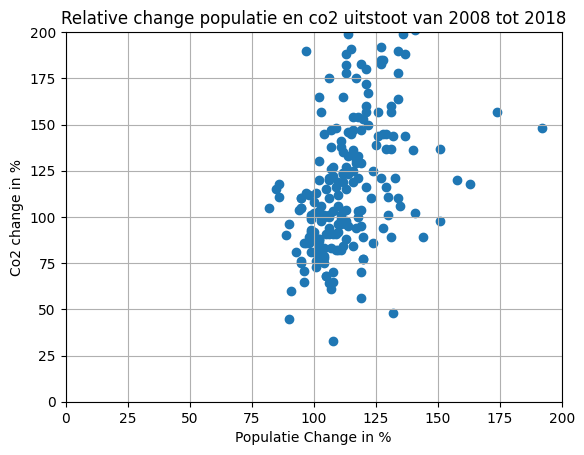

In [10]:
# dataframe met de waardes van 2008 & 2018 en de relative increase en of decrease
# vraag 2 = Biggest strides in decreasing CO2 output

warnings.filterwarnings("ignore", category=FutureWarning) # turn off error warning

vraag2 = df_owid_c02.loc[:, ["country", "year", "population", "co2"]]
vraag2.dropna(axis=0, inplace=True)
vraag2 = vraag2[(vraag2['year'].isin([2008, 2018]))]

list_unique_countries = vraag2['country'].unique()
newdf = pd.DataFrame(columns=['country', 'popchange_%', 'co2change_%'])

# new dataframe "newdf" bereken van elke country de popchange en de co2change van 2008 naar 2018
for x in list_unique_countries:
  row = vraag2[vraag2['country'] == x]

  pop_first = row['population'].iloc[0]
  pop_last = row['population'].iloc[1]
  pop_change = round((100 / pop_first) * pop_last)

  co2_first = row['co2'].iloc[0]
  co2_last = row['co2'].iloc[1]
  co2_change = round((100 / co2_first) * co2_last)

  new_row = {"country": x, "popchange_%": pop_change, "co2change_%": co2_change}
  newdf = newdf.append(new_row, ignore_index=True)


newdf = newdf.sort_values(by="popchange_%")
newdf.set_index("country", inplace=True)
newdf2 = newdf.astype(int) # alle waardes omgezet naar int voor de pearson correlation


plt.scatter(newdf2["popchange_%"], newdf["co2change_%"])
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.grid(True)
plt.title("Relative change populatie en co2 uitstoot van 2008 tot 2018")
plt.xlabel("Populatie Change in %")
plt.ylabel("Co2 change in %")


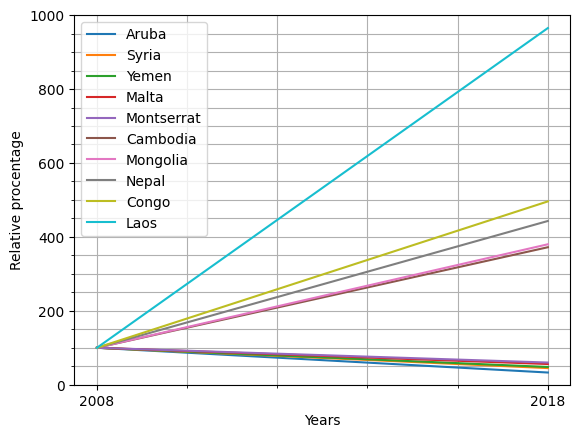

In [11]:
# lijn grafiek top 5 en botom 5 van co2 uitstoot

newdf3 = newdf2.loc[:, "co2change_%"]
newdf3 = newdf3.to_frame()
newdf3 = newdf3.sort_values(by="co2change_%", ascending=True)

newdf4 = pd.concat([newdf3.head(5), newdf3.tail(5)])
newdf4.insert(0, "2008", 100)
newdf4.rename(columns={'co2change_%': "2018"}, inplace=True)


for index, row in newdf4.iterrows():
    plt.plot(newdf4.columns, row, label=index)

plt.ylim(0, 1000)
plt.minorticks_on()
plt.grid(True, which='both')
plt.legend(loc='upper left')
plt.ylabel("Relative procentage")
plt.xlabel("Years")
plt.show()


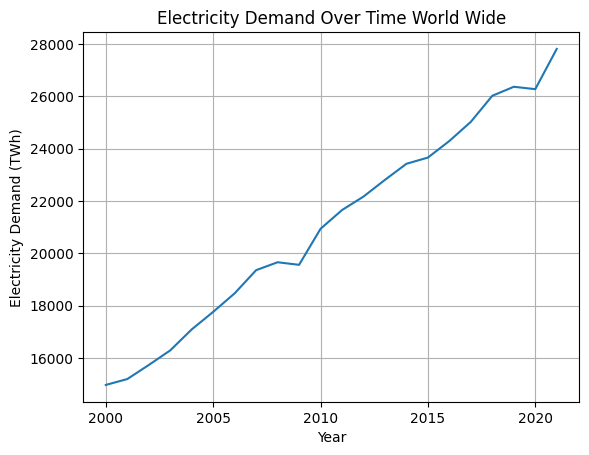

In [12]:
# data verwerking gebaseerd op een csv energy verbruik

#total verbruik energie in Terrawat
total_energy = energy_data.loc[:, ["country", "year", "electricity_demand"]]
total_energy.dropna(axis=0, inplace=True)

data = total_energy[total_energy['country'] == "World"]

plt.plot(data['year'], data['electricity_demand'])
plt.xlabel('Year')
plt.ylabel('Electricity Demand (TWh)')
plt.title('Electricity Demand Over Time World Wide')
plt.grid()


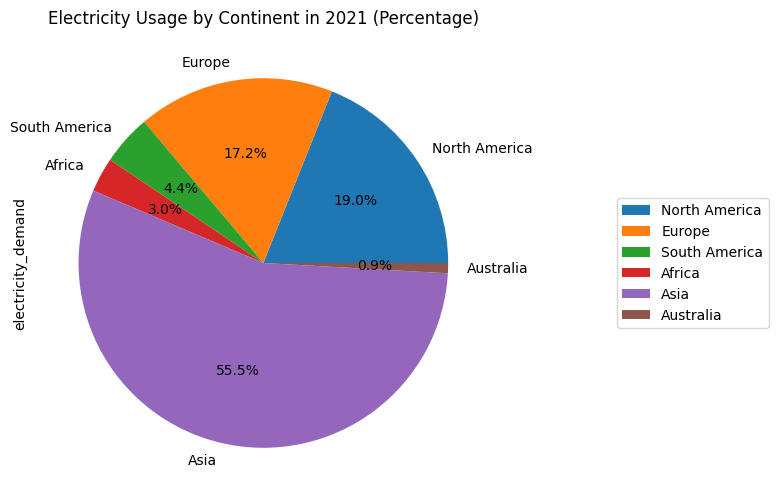

In [13]:
# overzicht verbruik stroom per continent van het jaar 2021
continenten_list2 = ["North America", "Europe", "South America", "Africa", "Asia", "Australia"]

# Data aanpassen zodat het gebruikt kan worden in een piechart
total_energy2 = total_energy[total_energy['year'] == 2021]
total_energy2.set_index("country", inplace=True)
total_energy2 = total_energy2.loc[continenten_list2]
total_energy2 = total_energy2.drop('year', axis=1)
total_energy2["electricity_demand"] = total_energy2["electricity_demand"].astype(int)


values = total_energy2["electricity_demand"]
labels = total_energy2.index.tolist()

# # Create the pie plot
ax = total_energy2.plot(kind='pie', figsize=(10, 6), legend=True, autopct='%1.1f%%', subplots=True)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.title("Electricity Usage by Continent in 2021 (Percentage)")
plt.show()


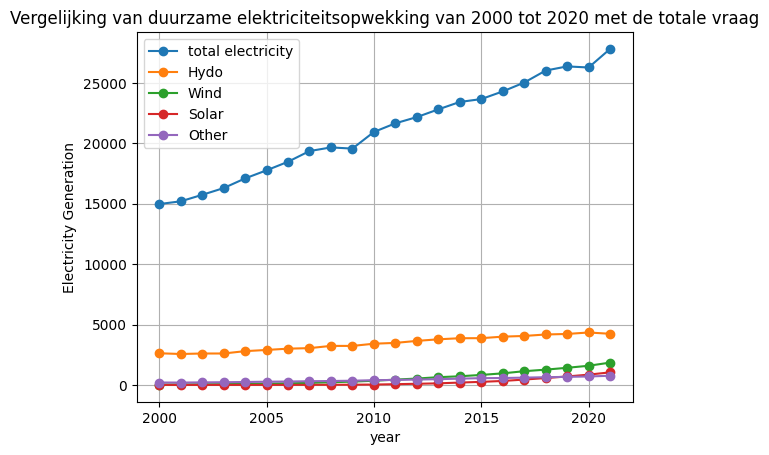

In [14]:
#overzicht non-fossil energy

# berekend in terawatt-hours
renew_data = energy_data.loc[:, ["country", "year", "electricity_demand", "population", "hydro_electricity", "wind_electricity", "solar_electricity", "other_renewable_electricity"]]
renew_data.dropna(axis=0, inplace=True)
renew_data.set_index("year", inplace=True)
renew_data_world = renew_data[renew_data['country'] == "World"]

columns_to_plot = ['electricity_demand', 'hydro_electricity', 'wind_electricity', 'solar_electricity', 'other_renewable_electricity']
label_list = ["total electricity", "Hydo", "Wind", "Solar", "Other"]
i=0

# Create a line plot for each column
for column in columns_to_plot:
    plt.plot(renew_data_world.index, renew_data_world[column], marker='o', linestyle='-', label=label_list[i])
    i+=1

plt.xlabel("year")
plt.ylabel('Electricity Generation')
plt.title("Vergelijking van duurzame elektriciteitsopwekking van 2000 tot 2020 met de totale vraag")
plt.grid()
plt.legend()
plt.show()



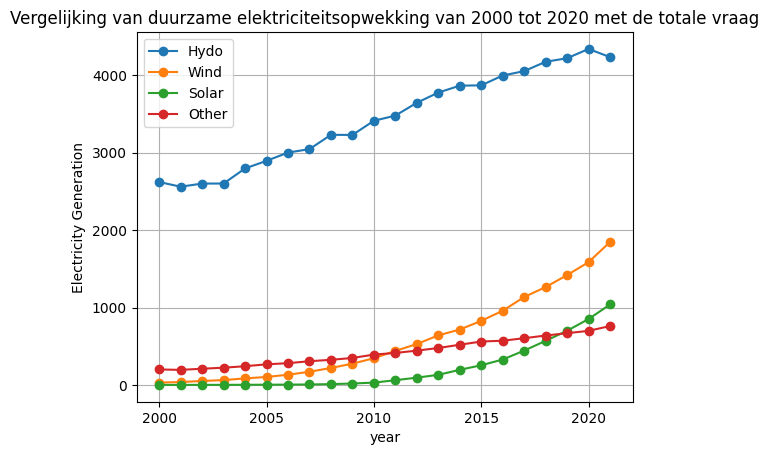

In [15]:
# zelfde grafiek maar dan zonder het totale verbruik

columns_to_plot = ['hydro_electricity', 'wind_electricity', 'solar_electricity', 'other_renewable_electricity']
label_list = ["Hydo", "Wind", "Solar", "Other"]
i=0

# Create a line plot for each column
for column in columns_to_plot:
    plt.plot(renew_data_world.index, renew_data_world[column], marker='o', linestyle='-', label=label_list[i])
    i+=1

plt.xlabel("year")
plt.ylabel('Electricity Generation')
plt.title("Vergelijking van duurzame elektriciteitsopwekking van 2000 tot 2020 met de totale vraag")
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Overzicht prijzen no-fossil energie in $/kWh

energy_price2 = energy_price.loc[:, ["Entity", "Year", "Solar photovoltaic levelized cost of energy", "Concentrated solar power levelized cost of energy", "Hydropower levelized cost of energy", "Offshore wind levelized cost of energy", "Onshore wind levelized cost of energy"]]
energy_price2 = energy_price2.rename(columns={'Entity': 'Country',
                                              "Solar photovoltaic levelized cost of energy" : "Solar",
                                              "Concentrated solar power levelized cost of energy" : "Concentrated Solar",
                                              "Hydropower levelized cost of energy" : "hydro",
                                              "Offshore wind levelized cost of energy" : "Offshore Wind",
                                              "Onshore wind levelized cost of energy" : "Onshore Wind"})

energy_price2 = energy_price2[energy_price2['Country'] == "World"]

energy_price3 = energy_price2 # kopie van de dataframe voor de prediction model

energy_price2 = energy_price2.sort_values('Year')
energy_price2.set_index("Year", inplace=True)
energy_price2 = energy_price2.drop('Country', axis=1)

ax = energy_price2.plot(kind='line', figsize=(10, 6), legend=True)
ax.grid(True)
plt.ylabel("$ / kWh")
plt.title("kosten non-fossil energy, dollars per kWh")


Text(0.5, 1.0, 'kosten non-fossil energy, dollars per kWh, vanaf 2022 linearRegression predicted prices')

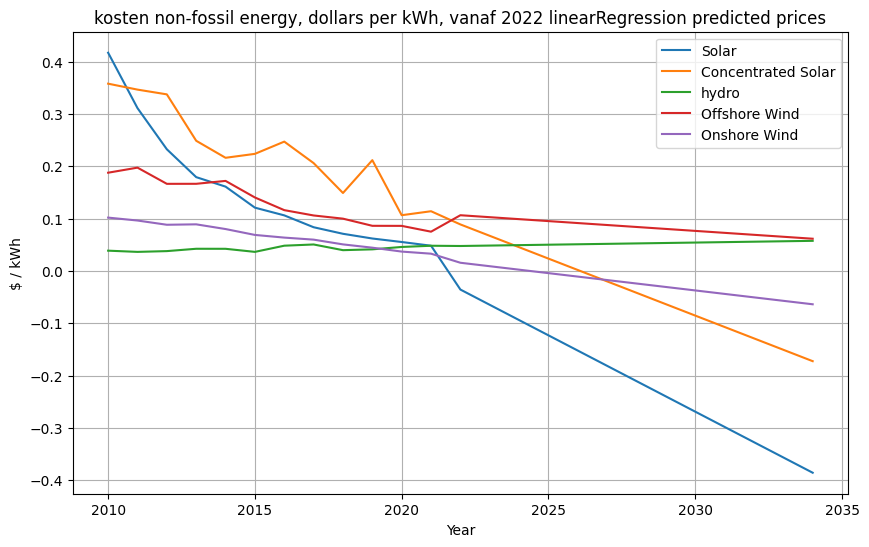

In [17]:
from sklearn.linear_model import LinearRegression

energy_price3 = energy_price3.sort_values('Year')
predicted_years = [year.year for year in pd.date_range(start='2022', end='2035', freq='Y')]
all_prices_dataframe = pd.DataFrame() # empty dataframe


for column_name, column_values in energy_price3.iloc[:, 2:].items():

  LR_Data = energy_price3.loc[:, ["Year", column_name]]
  LR_Data = LR_Data.dropna()

  x = LR_Data["Year"].values.reshape(-1, 1)
  y = LR_Data[column_name]

  model = LinearRegression()
  model.fit(x, y)
  LR = model.predict(x)

  # predicting prices
  predicted_years2 = np.array(predicted_years).reshape(-1, 1)
  predicted_prices = model.predict(predicted_years2) # predicting prices
  predicted_data = pd.DataFrame({'Year': predicted_years, column_name: predicted_prices}) # new dataframe with predicted prices

  # apd = all prices data
  apd = pd.concat([LR_Data, predicted_data])

  if not all_prices_dataframe.empty:
    all_prices_dataframe = pd.merge(all_prices_dataframe, apd, on="Year")
  else:
    all_prices_dataframe = apd


all_prices_dataframe2 = all_prices_dataframe.set_index("Year", inplace=True)

ax = all_prices_dataframe.plot(kind='line', figsize=(10, 6), legend=True)
ax.grid(True)
plt.ylabel("$ / kWh")
plt.title("kosten non-fossil energy, dollars per kWh, vanaf 2022 linearRegression predicted prices")
